<a href="https://colab.research.google.com/github/brock-ricker/food_sales_predictions/blob/main/Project_1_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sales Predictions

- Brock Ricker

- last update 03/12/2022

#Parts 1 and 2

- Data importing and cleaning

- 03/06/2022

In [ ]:
#Importing Data
import pandas as pd
filepath = "https://raw.githubusercontent.com/brock-ricker/food_sales_predictions/main/sales_predictions.csv"
df = pd.read_csv(filepath)


In [ ]:
#Initial Data Exploration

#Question 1
print(f"{df.shape[0]} rows and {df.shape[1]} columns")

#Question 2
print(df.info())

8523 rows and 12 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [ ]:
#Dropping Duplicates

#Question 3 - finding # of duplicates
dups = df.duplicated()
print(pd.value_counts(dups))
#This is coming back as false (non-dupicates) = 8523, which is the same number of rows as original table, meaning there are no duplicates
#another way to check is to try dropping duplicates and then check the size of the resulting table
df = df.drop_duplicates()
df.info()
#same size as original, no duplicates

False    8523
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [ ]:
#Question 4/5 Identifying missing values
#To start with, I can see from the df info that Item weight and Outlet size both have null entries (missing values)

#Start with item weight:
#To fill these missing values, I want to see if I can get the pertinant information from other rows.
weights = df.groupby("Item_Identifier")["Item_Weight"].unique()
#skimming this series, looks like most items have at least 1 entry for weight, lets use those entries to fill in the blanks. Ill take the mean of each weight entry(per unique item), in case there are >1 non-blank
#This will, in effect, replace the blank item wieghts with the average weight of the same item.
weights = df.groupby("Item_Identifier")["Item_Weight"].mean().round(2)
#creating dictionairy out of these values
weight_replace = weights.to_dict()
#use this dictionairy to replace the null values
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Identifier"].map(weight_replace))
print(df.info())
#now we only have 4 missing values. Since we are down to only 4 missing values out of 8500+, I would rather lose that data than risk is screwing up my analysis. I will most likely drop them, but lets deal with the Outlet size first, before making that decision.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB
None


In [ ]:
#Question 5 Identifying missing values cont...

#outlet size. I am going to try to use the same strategy as above for outlet size
size = df.groupby(["Outlet_Identifier","Outlet_Location_Type","Outlet_Type"])["Outlet_Size"].unique()
print(size)
#Thats not going to work, because the size of some outlets is unknown. And the size for a given outlet_location_type, or outlet_type is not consistent.
#If I was given this dataset in a professional setting, I would just pick up the phone and aska about these outlets, but since I don't know how this data will be used yet, I am going to just mark these missing values and "unknown"
df["Outlet_Size"] = df["Outlet_Size"].fillna("unknown")

#and lets drop the missing values now.
df = df.dropna(how = "any")

#Question 6 confirming no more missing data
df.info()
#no more missing data

Outlet_Identifier  Outlet_Location_Type  Outlet_Type      
OUT010             Tier 3                Grocery Store           [nan]
OUT013             Tier 3                Supermarket Type1      [High]
OUT017             Tier 2                Supermarket Type1       [nan]
OUT018             Tier 3                Supermarket Type2    [Medium]
OUT019             Tier 1                Grocery Store         [Small]
OUT027             Tier 3                Supermarket Type3    [Medium]
OUT035             Tier 2                Supermarket Type1     [Small]
OUT045             Tier 2                Supermarket Type1       [nan]
OUT046             Tier 1                Supermarket Type1     [Small]
OUT049             Tier 1                Supermarket Type1    [Medium]
Name: Outlet_Size, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     ---

In [ ]:
#Question 7 addressing  inconsistent data
#Lets look at unique values for each column and see if there are any oddities. I will skip the item identifier, because I would not be able to spot inconsistincies in those
#First lets split into numerical data and object types.
df_ints = df.select_dtypes(include = ["int64","float64"])
pd.set_option('display.max_columns', None)
df_ints.describe()
#All of these numbers seem OK

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875450,0.066112,141.010019,1997.837892,2181.188779
std,4.646083,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#Question 7 addressing  inconsistent data cont. - categorical
df_obj = df.select_dtypes(include = "object")
df_obj = df_obj.drop("Item_Identifier",1)
df_obj_cols = list(df_obj)
for col in df_obj_cols:
  print(f"{col}: {df_obj[col].unique()}\n")
#only column with issues is fat content

Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Outlet_Identifier: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Outlet_Size: ['Medium' 'unknown' 'High' 'Small']

Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']

Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#fat content
#first lets create the replacement dict
fat_cont = {"low fat":"Low Fat",
            "LF":"Low Fat",
            "reg":"Regular"
            }

df["Item_Fat_Content"] = df["Item_Fat_Content"].replace(to_replace = fat_cont)

#and check it
print(df["Item_Fat_Content"].unique())
#looks good

['Low Fat' 'Regular']


#Part 3

- Exploratory Vis

- 03/12/2022

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Medium     2790
unknown    2410
Small      2387
High        932
Name: Outlet_Size, dtype: int64


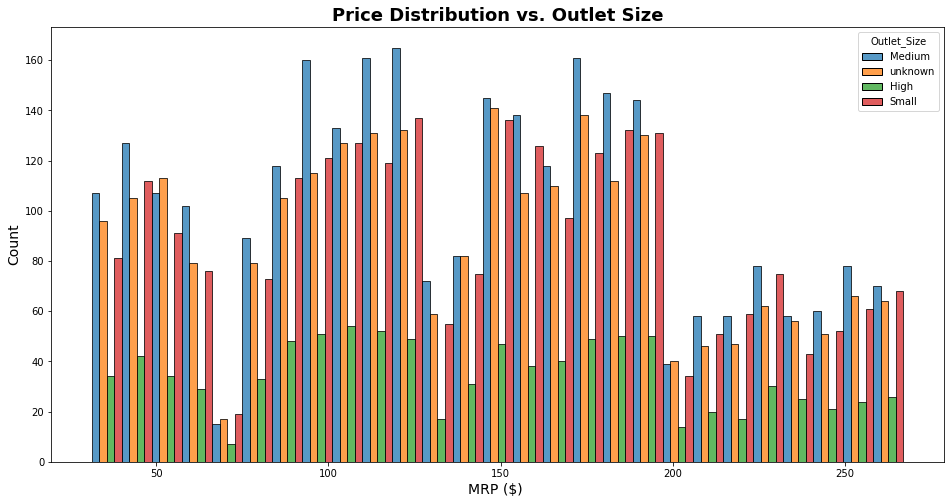

In [ ]:
#Histogram
#Lets look at the distribution of prices for items, and see if the outlet size has any effect on the price of the items they carry
plt.figure(figsize = (16,8))
plot_hist = sns.histplot(data = df, x = "Item_MRP", hue = "Outlet_Size", multiple = "dodge")
plot_hist.set_title('Price Distribution vs. Outlet Size',fontsize = 18, fontweight='bold' )
plot_hist.set_xlabel('MRP ($) ', fontsize = 14)
plot_hist.set_ylabel('Count', fontsize = 14);
print(pd.value_counts(df["Outlet_Size"]))
#Looks like the distribution of prices is roughly equal, but there are not many stores in the "high" category, which is why the counts are smaller for each bin in that size category

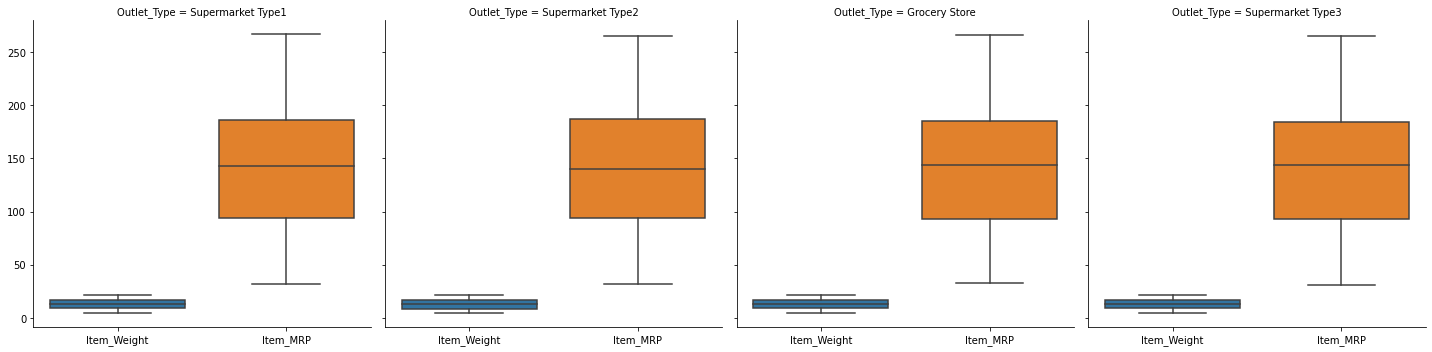

In [ ]:
#Boxplot
#Now lets try using boxplots to compare different items info accross different outlet types
df_item_info = df[["Item_Weight","Item_MRP","Outlet_Type"]]
plot_box = sns.catplot(data=df_item_info, col="Outlet_Type", kind="box")
#This is actually better for distribution comparison, because boxplots show sumamry statistics instead of counts.
#the distribution of items prices and weights accross the different store types is very similar

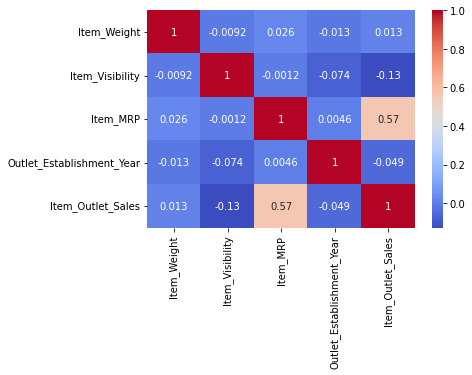

In [ ]:
#Heatmap
corr = df.corr()
sns.heatmap(corr, cmap = "coolwarm", annot = True);
#Interesting, looks like there is a correlation between item MRP, and sales ($) makes sense, more expensive items make the store more money

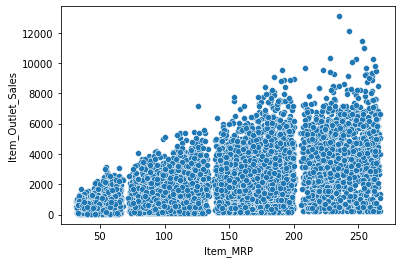

In [ ]:
#Lets look at that relationship
sns.scatterplot(data=df, x = "Item_MRP", y = "Item_Outlet_Sales");
#looks like the the price of an item, determines an upper bound of how much money a store can make on that specific item. This makes sense.

#Part 4

- Explanatory Vis

- 03/17/2022

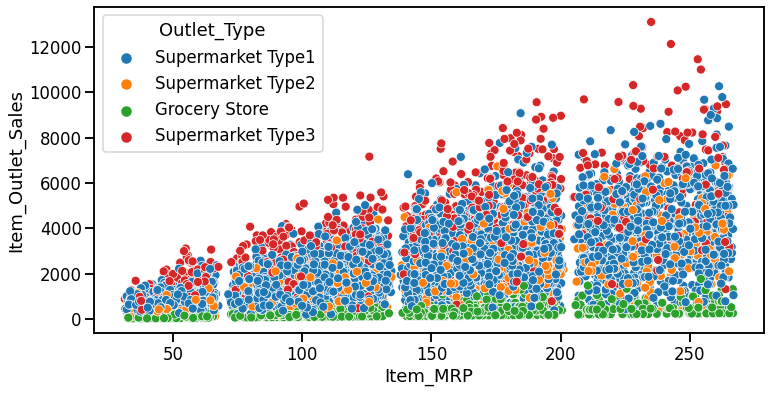

In [ ]:
#Lets further explore the trend we found in the previous section
fig, ax = plt.subplots(figsize=(12,6))
sns.set_context('talk')
sns.scatterplot(data=df, x = "Item_MRP", y = "Item_Outlet_Sales",hue = "Outlet_Type", ax=ax);

In [64]:
#looks like there is some difference in the amount of items each store type sells, but it is difficult to tell with them graphed on top of each other. Lets turn this plot into a function and split them up.
def sales_plot(dataframe,outlet_type):
  df_active = dataframe.loc[dataframe["Outlet_Type"]==outlet_type]
  fig, ax = plt.subplots(figsize=(12,6));
  ax.set(title=f'Item Sales($) vs. Item Price for {outlet_type}');
  sns.set_context('talk');
  ax.set_xlim(left=0,right=275)
  ax.set_xlabel("Item MRP ($)")
  ax.set_ylim(bottom=0,top=13000)
  ax.set_ylabel("Total Item Outlet Sales ($)")
  sns.scatterplot(data=df_active, x = "Item_MRP", y = "Item_Outlet_Sales", hue = "Outlet_Identifier",ax=ax);
  return fig,ax


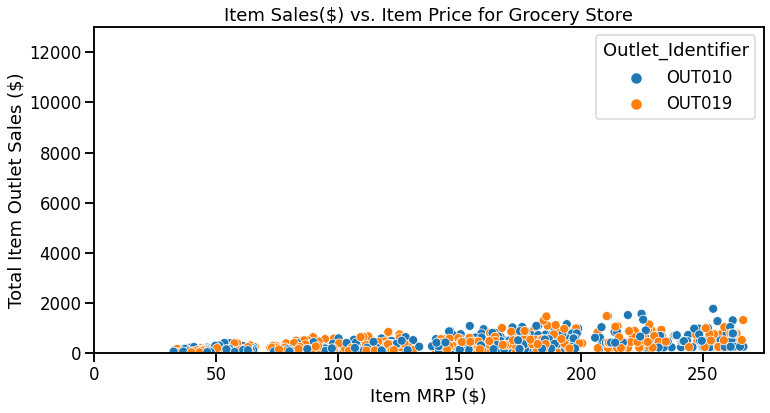

In [65]:
fig, ax = sales_plot(df,"Grocery Store")

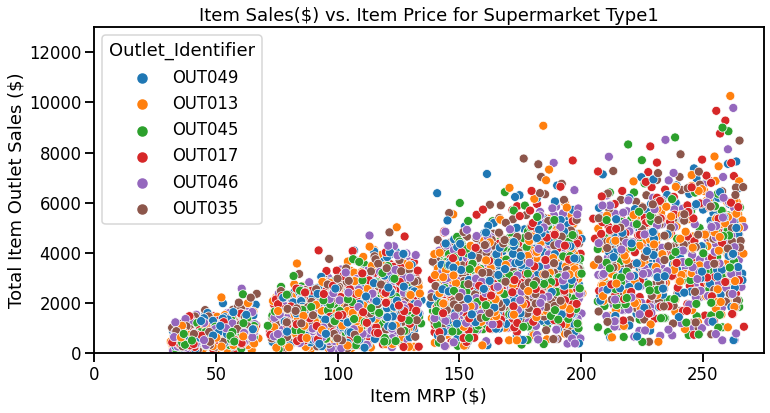

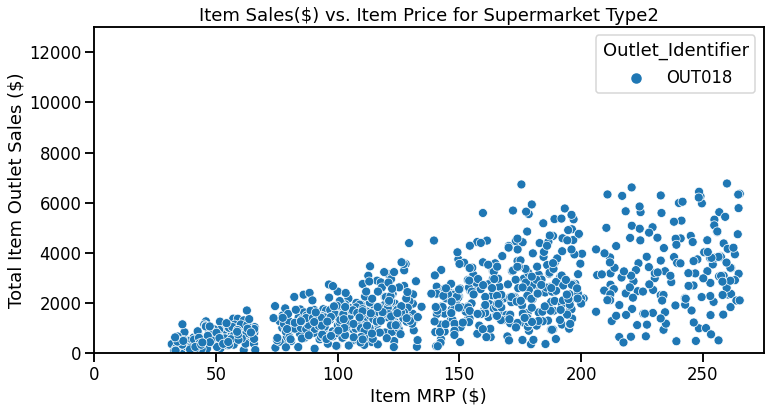

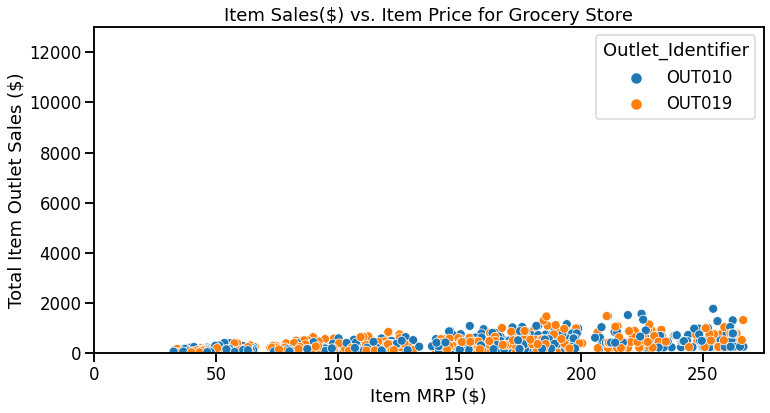

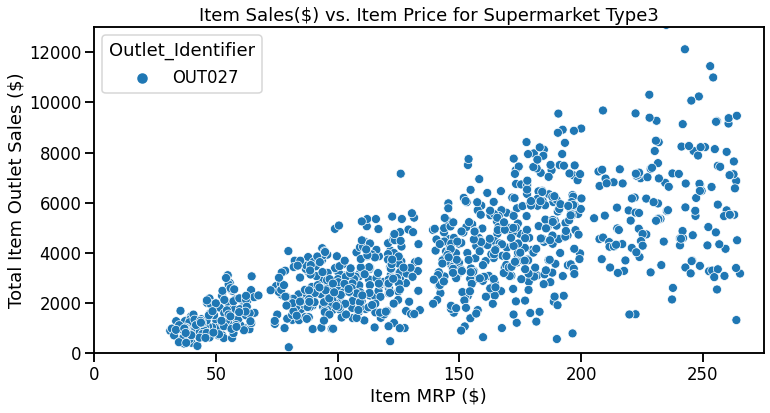

In [66]:
types = df["Outlet_Type"].unique()

for out_type in types:
  fig, ax = sales_plot(df,out_type)

#Looks like there is a relationship between outlet type and how much money they earn from certain products. This makes sense as the supermarkets do more volume thatn grocery stores.

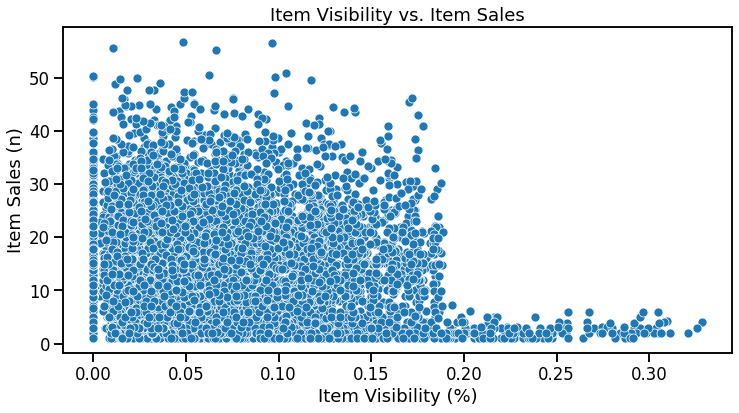

In [76]:
#Looks like the Item_Outlet_Sales is in amount of money, so lets calculate the number of items sold and analyze that.

df["Number_Of_Item_Outlet_Sales"] = df["Item_Outlet_Sales"]/df["Item_MRP"]



fig, ax = plt.subplots(figsize=(12,6));
ax.set(title='Item Visibility vs. Item Sales');
sns.set_context('talk');
ax.set_xlabel("Item Visibility (%)");
ax.set_ylabel("Item Sales (n)");
sns.scatterplot(data = df, x = "Item_Visibility", y="Number_Of_Item_Outlet_Sales");

#Looks like there is a weak negative correlation between visibility and # of items sold. This is probably because they make bad selling items more visible in an attempt to sell more.